In [1]:
import os
os.getcwd()

'/home/workspace/user-workspace'

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

submission = pd.read_csv('../data/.train/.task152/submission_sample.csv')

daily_sales = pd.read_csv('../data/.train/.task152/train/1_daily_sales.csv')
stock = pd.read_csv('../data/.train/.task152/train/2_stock.csv')
magazine = pd.read_csv('../data/.train/.task152/train/3_magazine.csv')
gdp = pd.read_csv('../data/.train/.task152/train/4_gdp.csv')
car_registration = pd.read_csv('../data/.train/.task152/train/5_car_registration.csv')
brand_sales = pd.read_csv('../data/.train/.task152/train/6_brand_sales.csv')
weather = pd.read_csv('../data/.train/.task152/train/7_weather.csv')
exchange_rate = pd.read_csv('../data/.train/.task152/train/8_exchange_rate.csv')

In [3]:
# 일별 타이어 판매량
daily_sales.head()

,YYYYMMDD,YYYY,MM,DD,OE/RE,L.Plant Name,Material,Tire Usage,Material Name,Pattern,Brand2,Qty
0,20150102,2015,1,2,RE,DP,1009298,PCR,"135/70R15T,04,H730,L,B,-,HK",H730,HK,4
1,20150102,2015,1,2,RE,DP,1009868,PCR,"145/70R13T,04,H730,L,B,-,HK",H730,HK,2
2,20150102,2015,1,2,RE,JP,1013465,PCR,"185/65R15H,04,H730,L,B,CE,HK",H730,HK,1
3,20150102,2015,1,2,RE,JP,1013467,PCR,"185/60R15T XL,04,H730,L,B,CE,HK",H730,HK,5
4,20150102,2015,1,2,RE,JP,1013469,PCR,"185/70R14T,04,H730,L,B,CE,HK",H730,HK,4


In [4]:
# 월별 타이어 재고
stock.head()

,YYMM,Winter Tire,All Season Winter\nTire,Stock Total
0,1501,-,-,-
1,1502,-,-,-
2,1503,-,-,-
3,1504,-,-,-
4,1505,-,-,-


In [5]:
# 연도별 타이어 매거진 평가 데이터
# 연도(Publication) + 계절(Category)
magazine

,Category,Grade,Magazine,Country,Tire size,Pattn,Publication,Result,Rank,Total
0,Winter,B,Auto Bild Sportscars,DE,225/40R18V XL,W310,2011,Recommendable,5,7
1,Winter,S,ADAC,DE,165/70R14T,W442,2012,Recommendable,12,15
2,Winter,S,ADAC,DE,205/55R16H,W442,2012,Recommendable,14,16
3,Winter,A,Auto Bild,DE,205/55R16H,W442,2012,Recommendable,4,15
4,Winter,A,Auto Motor und Sport,DE,205/55R16H,W442,2012,Limited Recommendable,10,13
5,Winter,B,Auto Bild Sportscars,DE,225/45R17V,W442,2012,Recommendable,5,9
6,Winter,B,Sport Auto,DE,225/40R18V,W310,2012,Limited Recommendable,8,8
7,Winter,S,ADAC,DE,185/60R15T,W442,2013,Recommendable,12,17
8,Winter,S,ADAC,DE,225/45R17H,W442,2013,Recommendable,12,15
9,Winter,A,Auto Bild,DE,195/65R15H,W442,2013,Recommendable,14,50


In [6]:
# 분기별 독일 GDP 데이터
# 4분기는 Q1, Q2, Q3, Q4로 표시되어있음
gdp.head()

,Date,Quarterly GDP \n(Million USD),Quat. GDP Growth (%),Quat. GDP Annual Growth (%)
0,2015Q1,840618,0.003,0.011
1,2015Q2,833496,0.004,0.016
2,2015Q3,842101,0.003,0.017
3,2015Q4,836917,0.005,0.011
4,2016Q1,854080,0.009,0.025


In [7]:
# 월별 차량 판매량
car_registration.head()

,Date,Commercial vehicles Month,Passengers vehicles Month
0,1501,21635,211337
1,1502,22006,223254
2,1503,31196,323039
3,1504,28422,291395
4,1505,25428,256385


In [8]:
# 월별, 브랜드별 차량 판매량
brand_sales.head()

,year,month,brand,sales
0,2015,1,Chevrolet,33
1,2015,1,Lancia,49
2,2015,1,Lexus,129
3,2015,1,Alfa Romeo,200
4,2015,1,Jaguar,233


In [9]:
# 독일 내 지역(region : 1, 2, 3)별, 월별 날씨 데이터
weather.head()

,region,yymm,max_temp,min_temp,avg_temp,snow_fall_days,snow_fall_cm
0,1,1501,15,-7,2,14,14.8
1,1,1502,14,-16,-1,15,12.6
2,1,1503,17,-4,7,4,1.8
3,1,1504,23,-4,11,4,3.9
4,1,1505,26,5,15,0,0.0


In [10]:
# 일별 환율데이터
exchange_rate.head()

,yyyymmdd,매매기준율(krw/euro)
0,20150102,1330.20
1,20150105,1316.95
2,20150106,1323.01
3,20150107,1311.21
4,20150108,1301.28


# 데이터 1차 가공

In [11]:
daily_sales

,YYYYMMDD,YYYY,MM,DD,OE/RE,L.Plant Name,Material,Tire Usage,Material Name,Pattern,Brand2,Qty
0,20150102,2015,1,2,RE,DP,1009298,PCR,"135/70R15T,04,H730,L,B,-,HK",H730,HK,4
1,20150102,2015,1,2,RE,DP,1009868,PCR,"145/70R13T,04,H730,L,B,-,HK",H730,HK,2
2,20150102,2015,1,2,RE,JP,1013465,PCR,"185/65R15H,04,H730,L,B,CE,HK",H730,HK,1
3,20150102,2015,1,2,RE,JP,1013467,PCR,"185/60R15T XL,04,H730,L,B,CE,HK",H730,HK,5
4,20150102,2015,1,2,RE,JP,1013469,PCR,"185/70R14T,04,H730,L,B,CE,HK",H730,HK,4
...,...,...,...,...,...,...,...,...,...,...,...,...
152438,20190930,2019,9,30,RE,MP,2021003,LTR,"195/75R16C,08,RW12,L,B,E-,HK",RW12,HK,84
152439,20190930,2019,9,30,RE,MP,2021006,LTR,"215/70R15C,08,RW12,L,B,E-,HK",RW12,HK,671
152440,20190930,2019,9,30,RE,MP,2021007,LTR,"225/65R16C,08,RW12,L,B,E-,HK",RW12,HK,1096
152441,20190930,2019,9,30,RE,MP,2021013,LTR,"215/60R16C,06,RW12,L,B,E-,HK",RW12,HK,120


In [12]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152443 entries, 0 to 152442
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   YYYYMMDD       152443 non-null  int64 
 1   YYYY           152443 non-null  int64 
 2   MM             152443 non-null  int64 
 3   DD             152443 non-null  int64 
 4   OE/RE          152443 non-null  object
 5   L.Plant Name   152443 non-null  object
 6   Material       152443 non-null  int64 
 7   Tire Usage     152443 non-null  object
 8   Material Name  152443 non-null  object
 9   Pattern        152443 non-null  object
 10  Brand2         152443 non-null  object
 11  Qty            152443 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 14.0+ MB


In [13]:
submission

,YYYYMMDD,Qty
0,20191001,100
1,20191002,100
2,20191003,100
3,20191004,100
4,20191005,100
...,...,...
62,20191220,100
63,20191223,100
64,20191227,100
65,20191230,100


# 1차 시계열 분석

In [14]:
import warnings
import itertools # 반복 가능한 데이터 스트림을 처리하는 데 유용한 많은 함수와 제네레이터가 포함
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm #통계분석 기능을 제공하는 파이썬 패키지
import matplotlib

#차트 기본 크기 설정
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [15]:
pd.set_option('display.max_columns',500) #생략없이 출력

In [16]:
sales=daily_sales.copy()

## Data Preprocessing

In [17]:
from datetime import datetime

In [18]:
date_list = []
for date in sales['YYYYMMDD']:
    date_s = "{0:-08d}".format(date)
    date_s = datetime.strptime(date_s, '%Y%m%d').strftime('%Y-%m-%d')
    date_list.append(date_s)

sales['YYYYMMDD']=date_list
sales['YYYYMMDD']

0         2015-01-02
1         2015-01-02
2         2015-01-02
3         2015-01-02
4         2015-01-02
             ...    
152438    2019-09-30
152439    2019-09-30
152440    2019-09-30
152441    2019-09-30
152442    2019-09-30
Name: YYYYMMDD, Length: 152443, dtype: object

In [19]:
sales['YYYYMMDD'] = sales.YYYYMMDD.apply(pd.to_datetime)

In [20]:
sales['YYYYMMDD']

0        2015-01-02
1        2015-01-02
2        2015-01-02
3        2015-01-02
4        2015-01-02
            ...    
152438   2019-09-30
152439   2019-09-30
152440   2019-09-30
152441   2019-09-30
152442   2019-09-30
Name: YYYYMMDD, Length: 152443, dtype: datetime64[ns]

In [21]:
sales['YYYYMMDD'].min(), sales['YYYYMMDD'].max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2019-09-30 00:00:00'))

In [22]:
# 필요없는 열 제거
cols=['YYYY','MM','DD','OE/RE','L.Plant Name','Material','Tire Usage','Material Name','Pattern','Brand2']
sales.drop(cols, axis=1, inplace=True)

In [23]:
sales.head()

,YYYYMMDD,Qty
0,2015-01-02,4
1,2015-01-02,2
2,2015-01-02,1
3,2015-01-02,5
4,2015-01-02,4


In [24]:
sales = sales.sort_values('YYYYMMDD')

In [25]:
sales = sales.groupby('YYYYMMDD')['Qty'].sum().reset_index()

In [26]:
sales.head()

,YYYYMMDD,Qty
0,2015-01-02,22
1,2015-01-05,702
2,2015-01-06,1289
3,2015-01-07,2165
4,2015-01-08,2638


In [27]:
#index를 YYYYMMDD로 한다.
sales = sales.set_index('YYYYMMDD')

In [28]:
sales.head()

,Qty
YYYYMMDD,
2015-01-02,22
2015-01-05,702
2015-01-06,1289
2015-01-07,2165
2015-01-08,2638


In [29]:
sales.tail()

,Qty
YYYYMMDD,
2019-09-24,23416
2019-09-25,59218
2019-09-26,75339
2019-09-27,22552
2019-09-30,33379


In [30]:
sales.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-21',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='YYYYMMDD', length=1256, freq=None)

### resampling
resample 연산을 쓰면 시간 간격을 재조정하는 리샘플링(resampling)이 가능하다. 이 때 시간 구간이 작아지면 데이터 양이 증가한다고 해서 업-샘플링(up-sampling)이라 하고 시간 구간이 커지면 데이터 양이 감소한다고 해서 다운-샘플링(down-sampling)이라 부른다

In [31]:
#MS는인덱스는 해당 월의 마지막 일자로 표시를 시작일로 변경
y = sales['Qty'].resample('W').median()

In [32]:
#2015년 매출
y['2019']

YYYYMMDD
2019-01-06    10397.0
2019-01-13     5369.0
2019-01-20     4449.0
2019-01-27     3478.0
2019-02-03     4508.0
2019-02-10     3822.0
2019-02-17     4608.0
2019-02-24     4621.0
2019-03-03     2496.0
2019-03-10     2550.0
2019-03-17     2841.0
2019-03-24     1792.0
2019-03-31     1592.5
2019-04-07     3266.0
2019-04-14     4870.0
2019-04-21     5003.0
2019-04-28     5195.0
2019-05-05     5005.0
2019-05-12     3031.0
2019-05-19     3855.0
2019-05-26     8176.5
2019-06-02    13150.0
2019-06-09     6155.0
2019-06-16     9318.0
2019-06-23    25079.0
2019-06-30    22905.0
2019-07-07     7784.0
2019-07-14    21469.0
2019-07-21    25226.0
2019-07-28    26841.5
2019-08-04    12849.0
2019-08-11    13615.0
2019-08-18    19742.0
2019-08-25    35878.5
2019-09-01    25815.0
2019-09-08     9152.0
2019-09-15    10633.0
2019-09-22    18836.0
2019-09-29    24745.0
2019-10-06    33379.0
Freq: W-SUN, Name: Qty, dtype: float64

### resampling
resample 연산을 쓰면 시간 간격을 재조정하는 리샘플링(resampling)이 가능하다. 이 때 시간 구간이 작아지면 데이터 양이 증가한다고 해서 업-샘플링(up-sampling)이라 하고 시간 구간이 커지면 데이터 양이 감소한다고 해서 다운-샘플링(down-sampling)이라 부른다

## Visualizing Sales Time Series Data

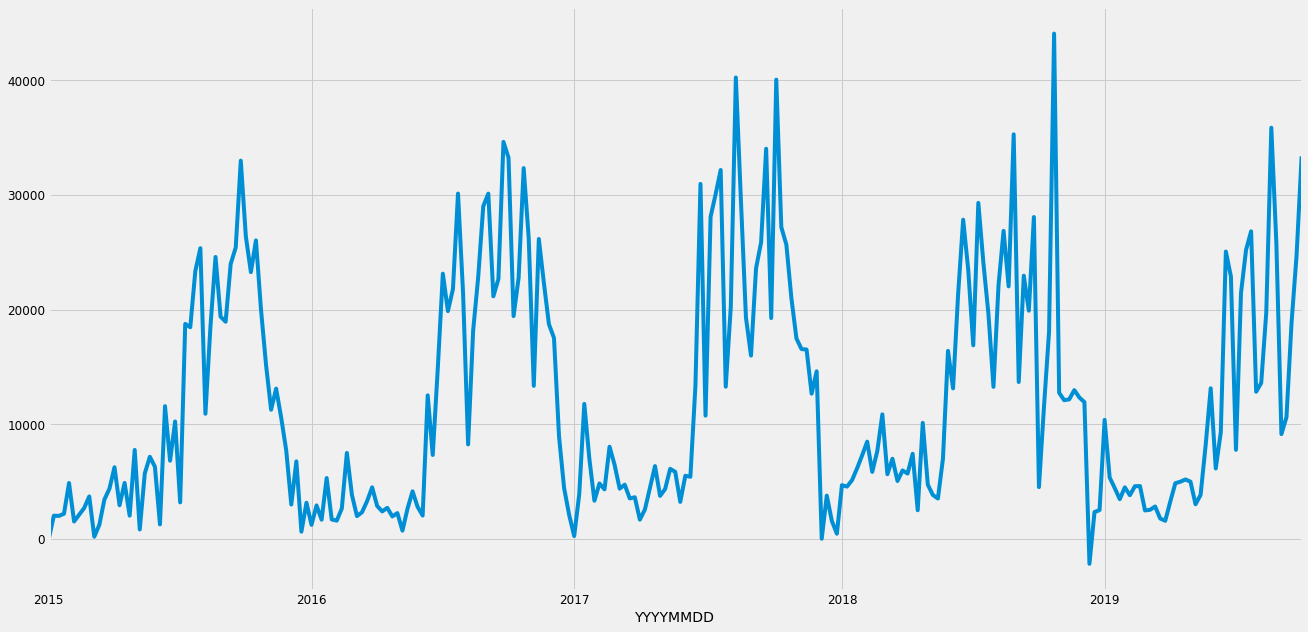

In [33]:
y.plot(figsize = (20,10))
plt.show()

계절 패턴 확인됨

In [34]:
#차트 기본 크기 설정
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

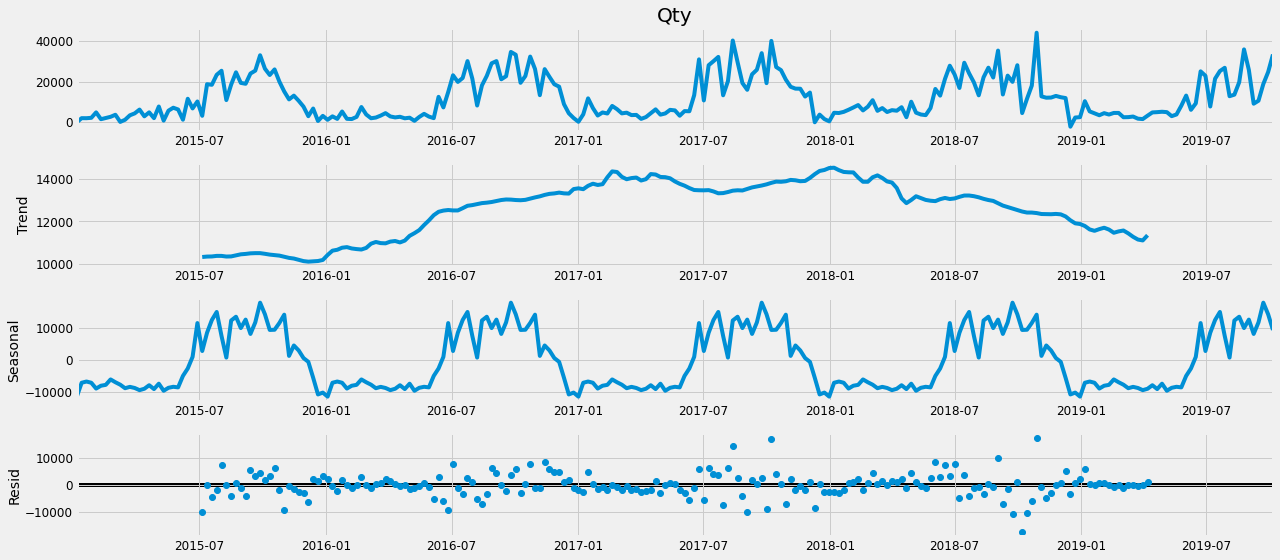

In [35]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA

In [36]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [37]:
# grid search로 파라미터 찾기
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5501.7515947502525
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5173.958211058016
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5175.867044137689
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4852.17104081266
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5159.13180432903
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5102.021239934104
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4940.450944140766
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4850.682673082038
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5352.6297819338
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5079.119404167795
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5074.643995086463
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4760.478736570851
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5116.057923631573
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5057.22948899587
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4850.5502611828415
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4762.108318147364
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5091.096636974448
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4853.736442906125
ARIMA(0, 1, 0

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:4663.106464265107
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:4866.855138656158
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:4867.496593068128
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:4717.572749614144
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:4664.340033903751
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:5047.620735523452
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:4812.792623441757
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:4976.559975995842
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:4623.472927483539
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:4833.122023985105
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:4808.915365255969
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:4701.537189485296
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:4624.748452766624
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:5068.324189191284
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:4832.580894661889
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:5003.970086444875
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:4642.305515956489
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:4833.123870362268
ARIMA(1, 1

## Fitting the ARIMA model

In [38]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1380      0.214      0.644      0.520      -0.282       0.558
ma.L1         -0.5862      0.189     -3.096      0.002      -0.957      -0.215
ma.S.L12      -1.0066      0.071    -14.092      0.000      -1.147      -0.867
sigma2      9.003e+07   3.47e-10   2.59e+17      0.000       9e+07       9e+07


In [57]:
# # Save the model
import joblib
joblib.dump(mod, './model/model_152.pkl') 

mod = joblib.load('./model/model_152.pkl') 

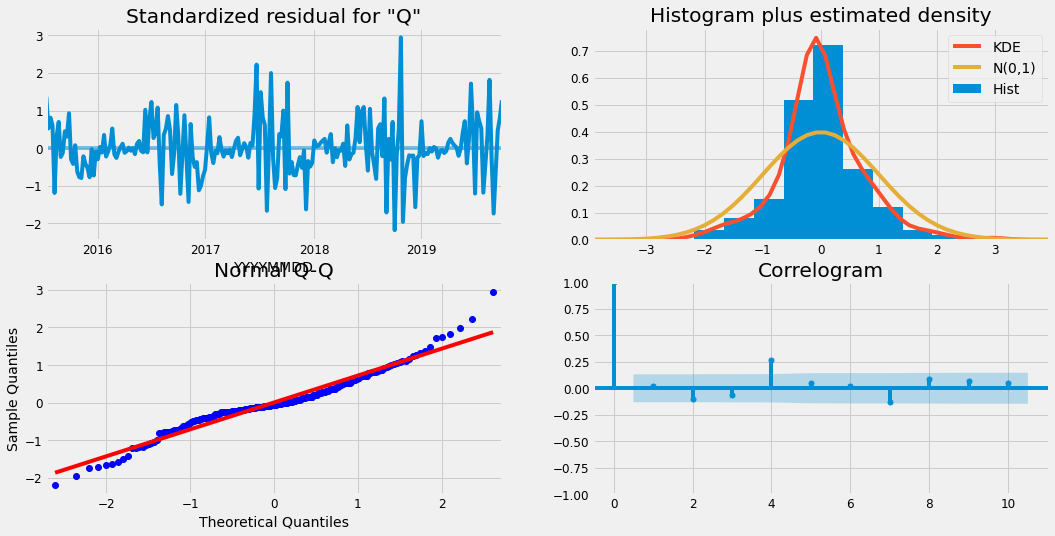

In [39]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Validating forecasts

모델 잔차가 정규 분포에 가깝다

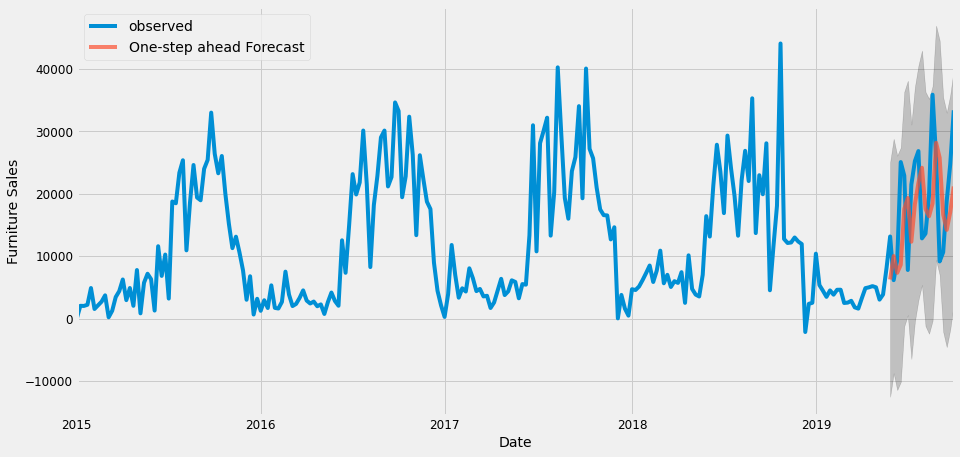

In [41]:
pred = results.get_prediction(start=pd.to_datetime('2019-06-02'), dynamic=False)
pred_ci = pred.conf_int() #추정된 계수의 신뢰구간 계산
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [42]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-06-02':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 87568208.45


In [43]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 9357.79


## Producing and visualing forecasts

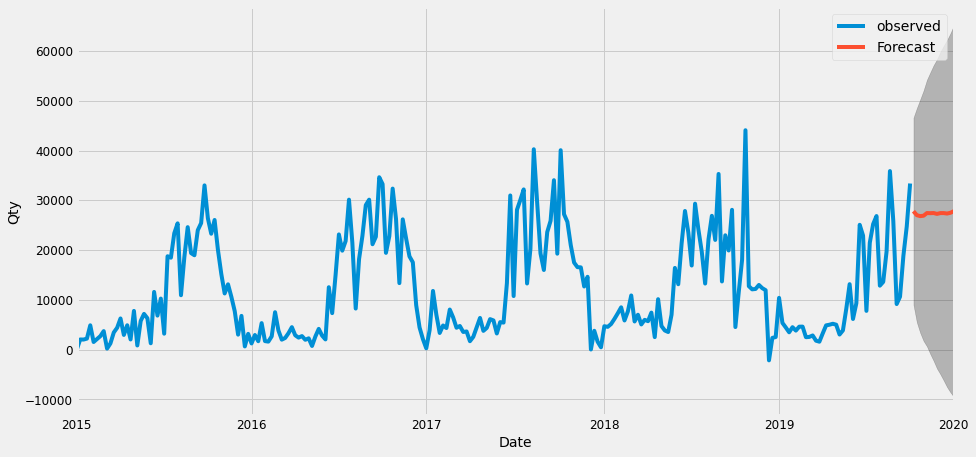

In [44]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Qty')
plt.legend()
plt.show()

In [45]:
aa = pd.DataFrame(y.iloc[-2:])
aa.rename(columns={'Qty':'predicted_mean'},inplace=True)
aa

,predicted_mean
YYYYMMDD,
2019-09-29,24745.0
2019-10-06,33379.0


In [46]:
predic = pd.DataFrame(pred_uc.predicted_mean)
bb = predic.iloc[:14]
bb

,predicted_mean
2019-10-13,27807.569096
2019-10-20,27014.143058
2019-10-27,26827.304845
2019-11-03,26904.628408
2019-11-10,27437.780183
2019-11-17,27417.991379
2019-11-24,27447.143742
2019-12-01,27272.819044
2019-12-08,27433.131744
2019-12-15,27437.698994


In [47]:
final = pd.concat([aa,bb])
final

,predicted_mean
2019-09-29,24745.000000
2019-10-06,33379.000000
2019-10-13,27807.569096
2019-10-20,27014.143058
2019-10-27,26827.304845
2019-11-03,26904.628408
2019-11-10,27437.780183
2019-11-17,27417.991379
2019-11-24,27447.143742
2019-12-01,27272.819044


In [48]:
predic_upsample = final.resample('B').median()
predic_upsample

,predicted_mean
2019-09-27,24745.000000
2019-09-30,NaN
2019-10-01,NaN
2019-10-02,NaN
2019-10-03,NaN
...,...
2019-12-30,NaN
2019-12-31,NaN
2020-01-01,NaN
2020-01-02,NaN


In [49]:
predict3 = predic_upsample.interpolate(method='time')
predict_df = predict3.iloc[2:-3]

In [50]:
predict_df

,predicted_mean
2019-10-01,29678.714286
2019-10-02,30912.142857
2019-10-03,32145.571429
2019-10-04,33379.000000
2019-10-07,30991.243898
...,...
2019-12-25,27450.580098
2019-12-26,27472.116312
2019-12-27,27493.652525
2019-12-30,27632.824007


In [51]:
result = list(predict_df['predicted_mean'])
result

[29678.714285714286,
 30912.142857142855,
 32145.571428571428,
 33379.0,
 30991.243898195953,
 30195.325197594604,
 29399.40649699325,
 28603.487796391903,
 27807.569095790554,
 27467.52936526337,
 27354.182788420974,
 27240.83621157858,
 27127.489634736186,
 27014.14305789379,
 26934.069538234973,
 26907.378365015367,
 26880.68719179576,
 26853.996018576156,
 26827.30484535655,
 26860.443514849932,
 26871.489738014396,
 26882.535961178855,
 26893.58218434332,
 26904.62840750778,
 27133.12202546398,
 27209.286564782717,
 27285.451104101452,
 27361.615643420184,
 27437.78018273892,
 27429.299266783582,
 27426.472294798466,
 27423.645322813354,
 27420.81835082824,
 27417.99137884313,
 27430.485248930003,
 27434.64987229229,
 27438.814495654584,
 27442.979119016873,
 27447.143742379165,
 27372.43315719427,
 27347.529628799304,
 27322.62610040434,
 27297.722572009374,
 27272.81904361441,
 27341.524486517505,
 27364.426300818533,
 27387.328115119566,
 27410.229929420595,
 27433.131743721628

In [52]:
result.insert(4, 32185.1219)

In [53]:
result

[29678.714285714286,
 30912.142857142855,
 32145.571428571428,
 33379.0,
 32185.1219,
 30991.243898195953,
 30195.325197594604,
 29399.40649699325,
 28603.487796391903,
 27807.569095790554,
 27467.52936526337,
 27354.182788420974,
 27240.83621157858,
 27127.489634736186,
 27014.14305789379,
 26934.069538234973,
 26907.378365015367,
 26880.68719179576,
 26853.996018576156,
 26827.30484535655,
 26860.443514849932,
 26871.489738014396,
 26882.535961178855,
 26893.58218434332,
 26904.62840750778,
 27133.12202546398,
 27209.286564782717,
 27285.451104101452,
 27361.615643420184,
 27437.78018273892,
 27429.299266783582,
 27426.472294798466,
 27423.645322813354,
 27420.81835082824,
 27417.99137884313,
 27430.485248930003,
 27434.64987229229,
 27438.814495654584,
 27442.979119016873,
 27447.143742379165,
 27372.43315719427,
 27347.529628799304,
 27322.62610040434,
 27297.722572009374,
 27272.81904361441,
 27341.524486517505,
 27364.426300818533,
 27387.328115119566,
 27410.229929420595,
 27433

In [54]:
submission.head(30)

,YYYYMMDD,Qty
0,20191001,100
1,20191002,100
2,20191003,100
3,20191004,100
4,20191005,100
5,20191007,100
6,20191008,100
7,20191009,100
8,20191010,100
9,20191011,100


In [55]:
submission['Qty'] = result
submission.head()

,YYYYMMDD,Qty
0,20191001,29678.714286
1,20191002,30912.142857
2,20191003,32145.571429
3,20191004,33379.000000
4,20191005,32185.121900


In [56]:
submission.to_csv('./submit_tire_ej4.csv', index=False)

In [60]:
from nipa.taskSubmit import nipa_submit

team_id="1345"
task_no="152"
nipa_submit(team_id=team_id,
            task_no=task_no,
            result='./submit_tire_ej4.csv')

20201110213706033793_qyrf.csv: 200


### 반올림

In [56]:
submission['Qty'] = [round(x) for x in result]
submission.head()

,YYYYMMDD,Qty
0,20191001,29679
1,20191002,30912
2,20191003,32146
3,20191004,33379
4,20191005,32185


In [62]:
submission.to_csv('./submit_tire_ej5.csv', index=False)

In [64]:
from nipa.taskSubmit import nipa_submit

team_id="1345"
task_no="152"
nipa_submit(team_id=team_id,
            task_no=task_no,
            result='./submit_tire_ej5.csv')

20201111095558482504_Ys44.csv: 200
